In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel("Asthama.xlsx")

In [3]:
df.shape

(1499, 17)

In [4]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               1499 non-null   object 
 1   Age                      1499 non-null   int64  
 2   Gender                   1499 non-null   object 
 3   BMI                      1499 non-null   float64
 4   Smoking_Status           1499 non-null   object 
 5   Family_History           1499 non-null   int64  
 6   Allergies                1049 non-null   object 
 7   Air_Pollution_Level      1499 non-null   object 
 8   Physical_Activity_Level  1499 non-null   object 
 9   Occupation_Type          1499 non-null   object 
 10  Comorbidities            734 non-null    object 
 11  Medication_Adherence     1499 non-null   float64
 12  Number_of_ER_Visits      1499 non-null   int64  
 13  Peak_Expiratory_Flow     1499 non-null   float64
 14  FeNO_Level              

In [6]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Family_History', 'Allergies', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow',
       'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level'],
      dtype='object')

In [7]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                   450
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities               765
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       1134
dtype: int64

In [8]:
df.fillna(df["Asthma_Control_Level"]=="7")

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,ASTH101494,3,Other,21.8,Former,0,Multiple,Low,Moderate,Indoor,NaN,0.25,1,302.6,21.8,0,NaN
1495,ASTH101495,6,Male,22.5,Former,1,Pets,Low,Sedentary,Outdoor,Diabetes,0.47,1,424.7,30.6,1,Not Controlled
1496,ASTH101496,5,Male,21.9,Never,0,NaN,Moderate,Sedentary,Outdoor,NaN,0.46,1,355.3,33.3,0,NaN
1497,ASTH101497,5,Female,20.1,Former,0,NaN,High,Sedentary,Indoor,Diabetes,0.43,2,600.0,20.2,0,NaN


In [9]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                   450
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities               765
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       1134
dtype: int64

In [10]:
null_percent = df.isnull().mean() * 100
print(null_percent)


Patient_ID                  0.000000
Age                         0.000000
Gender                      0.000000
BMI                         0.000000
Smoking_Status              0.000000
Family_History              0.000000
Allergies                  30.020013
Air_Pollution_Level         0.000000
Physical_Activity_Level     0.000000
Occupation_Type             0.000000
Comorbidities              51.034023
Medication_Adherence        0.000000
Number_of_ER_Visits         0.000000
Peak_Expiratory_Flow        0.000000
FeNO_Level                  0.000000
Has_Asthma                  0.000000
Asthma_Control_Level       75.650434
dtype: float64


In [11]:
df['Allergies'] = df['Allergies'].fillna(df['Allergies'].mode()[0])

In [12]:
df=df.drop("Patient_ID",axis=1)
df=df.drop("Asthma_Control_Level",axis=1)
df=df.drop("Comorbidities",axis=1)


In [13]:
df.head(10)

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,Female,27.6,Former,1,Dust,Moderate,Sedentary,Outdoor,0.38,0,421.0,46.0,0
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,0.60,2,297.6,22.9,0
2,72,Female,17.6,Never,0,Dust,Moderate,Moderate,Indoor,0.38,0,303.3,15.3,0
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,0.60,1,438.0,40.1,1
4,21,Male,30.2,Never,0,Dust,Moderate,Active,Indoor,0.82,3,535.0,27.7,0
5,83,Other,27.8,Never,1,Pollen,Moderate,Moderate,Outdoor,0.18,2,232.9,45.1,0
6,87,Female,32.3,Former,0,Pollen,Moderate,Sedentary,Outdoor,0.18,0,370.7,14.1,0
7,75,Male,29.7,Never,0,Pets,High,Sedentary,Indoor,0.53,0,302.2,17.6,1
8,75,Male,23.1,Never,0,Pollen,Moderate,Moderate,Indoor,0.83,2,523.4,27.6,0
9,88,Male,15.0,Current,1,Dust,Low,Active,Indoor,0.36,3,377.0,14.9,0


In [14]:
df.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,43.511007,25.039626,0.296197,0.496017,1.004670,403.345497,25.484390,0.243496
std,25.621234,4.830812,0.456732,0.228677,1.010283,98.231751,9.745048,0.429335
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,21.000000,21.600000,0.000000,0.320000,0.000000,332.200000,19.000000,0.000000
50%,43.000000,24.900000,0.000000,0.500000,1.000000,406.500000,25.700000,0.000000
75%,64.000000,28.400000,1.000000,0.670000,2.000000,471.200000,31.800000,0.000000
max,89.000000,41.200000,1.000000,0.990000,5.000000,600.000000,54.400000,1.000000


In [15]:
df["Allergies"].value_counts()

Allergies
Dust        813
Pollen      314
Pets        225
Multiple    147
Name: count, dtype: int64

In [16]:
df["Gender"].value_counts()


Gender
Female    733
Male      695
Other      71
Name: count, dtype: int64

In [17]:
df["Air_Pollution_Level"].value_counts()

Air_Pollution_Level
Moderate    738
Low         449
High        312
Name: count, dtype: int64

In [18]:
df["Physical_Activity_Level"].value_counts()


Physical_Activity_Level
Sedentary    629
Moderate     566
Active       304
Name: count, dtype: int64

In [19]:
df["Smoking_Status"].value_counts()


Smoking_Status
Never      885
Former     415
Current    199
Name: count, dtype: int64

In [20]:
df["Occupation_Type"].value_counts()

Occupation_Type
Indoor     1061
Outdoor     438
Name: count, dtype: int64

<Axes: xlabel='BMI'>

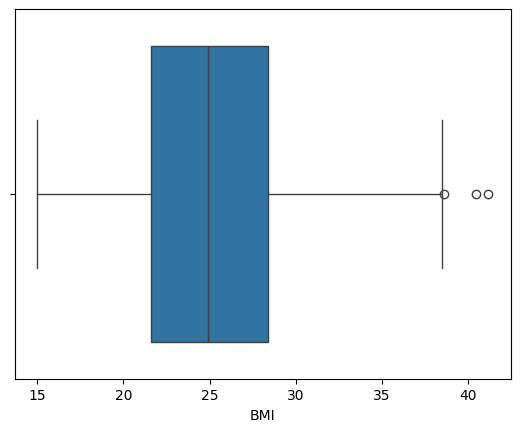

In [21]:
sns.boxplot(x='BMI', data=df)

C:\Users\As\AppData\Local\Temp\ipykernel_8424\555082265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Has_Asthma', data=df , palette="mako")


<Axes: xlabel='Has_Asthma', ylabel='count'>

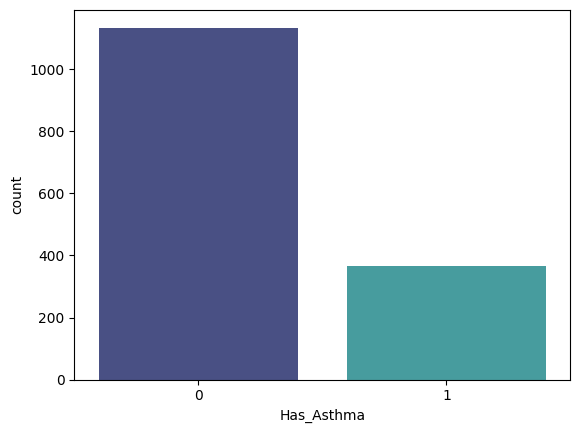

In [22]:
# df['Has_Asthma'].value_counts(normalize=True)
sns.countplot(x='Has_Asthma', data=df , palette="mako")


In [23]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies',
       'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow',
       'FeNO_Level', 'Has_Asthma'],
      dtype='object')

C:\Users\As\AppData\Local\Temp\ipykernel_8424\1184902104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Family_History"],y=df["Has_Asthma"],data=df ,palette='mako')


<Axes: xlabel='Family_History', ylabel='Has_Asthma'>

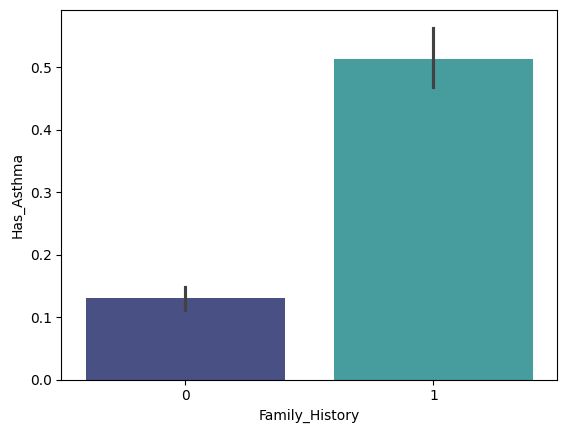

In [24]:
# dff = df[["Family_History","Allergies","Physical_Activity_Level"]]
sns.barplot(x=df["Family_History"],y=df["Has_Asthma"],data=df ,palette='mako')
# plt.bar(dff["Family_History"],df["Has_Asthma"])
# plt.xlabel("ff")
# plt.ylabel("Has_Asthma")
# plt.pie(df["Has_Asthma"],labels=df["ff"],autopct='%1.f%%')
# plt.title('Monthly Sales')

<Axes: xlabel='Age', ylabel='count'>

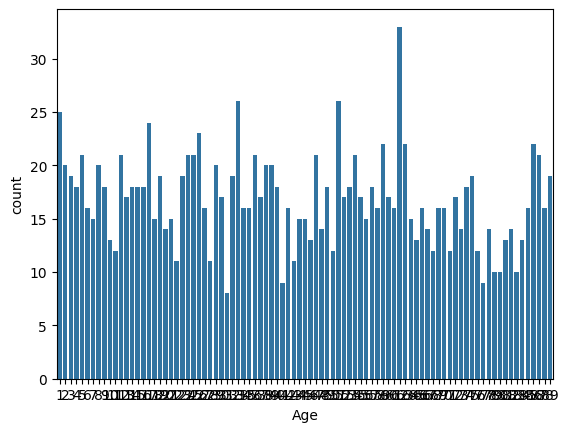

In [25]:
sns.countplot(x="Age",data=df)


C:\Users\As\AppData\Local\Temp\ipykernel_8424\475153094.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Gender"] ,y=df["Has_Asthma"],data=df, palette='mako')


<Axes: xlabel='Gender', ylabel='Has_Asthma'>

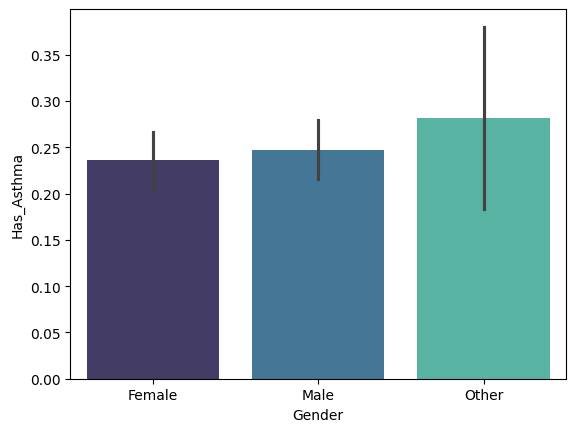

In [26]:
sns.barplot(x=df["Gender"] ,y=df["Has_Asthma"],data=df, palette='mako')


<Axes: xlabel='Age', ylabel='Has_Asthma'>

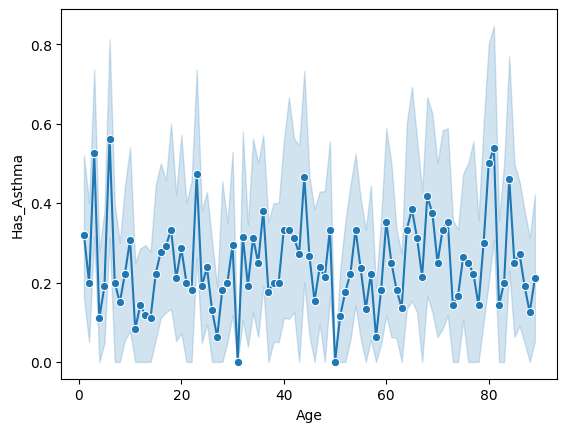

In [27]:
sns.lineplot(x=df["Age"], y=df["Has_Asthma"], data=df, marker='o')

In [28]:
df["Physical_Activity_Level"]

0       Sedentary
1        Moderate
2        Moderate
3       Sedentary
4          Active
          ...    
1494     Moderate
1495    Sedentary
1496    Sedentary
1497    Sedentary
1498     Moderate
Name: Physical_Activity_Level, Length: 1499, dtype: object

<Axes: xlabel='Physical_Activity_Level', ylabel='Gender'>

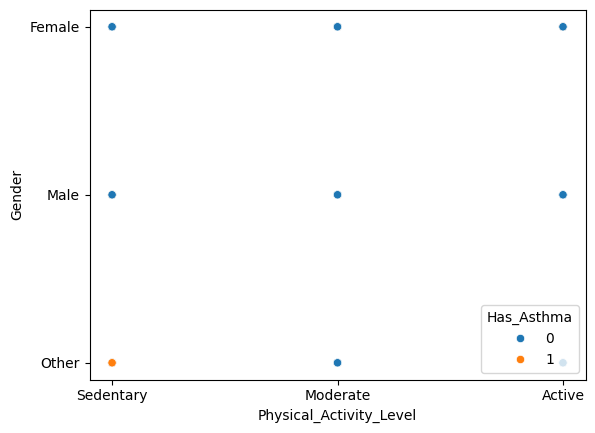

In [29]:

sns.scatterplot(x='Physical_Activity_Level', y='Gender', hue='Has_Asthma', data=df)



<Axes: xlabel='Physical_Activity_Level', ylabel='Has_Asthma'>

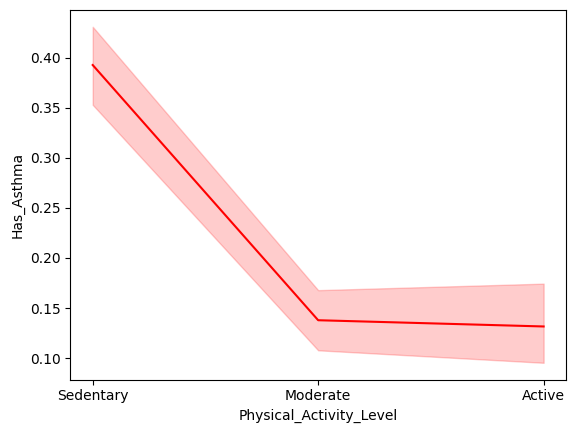

In [30]:
sns.lineplot(x=df["Physical_Activity_Level"],y=df["Has_Asthma"],color="red")

C:\Users\As\AppData\Local\Temp\ipykernel_8424\84411312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Has_Asthma"],y=df["Allergies"],palette='mako')


<Axes: xlabel='Has_Asthma', ylabel='Allergies'>

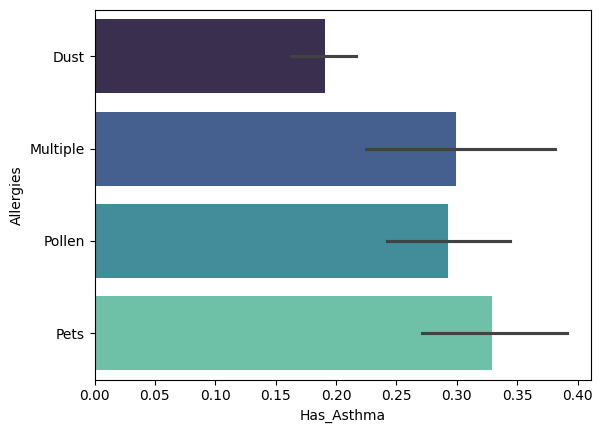

In [31]:
sns.barplot(x=df["Has_Asthma"],y=df["Allergies"],palette='mako')

<Axes: >

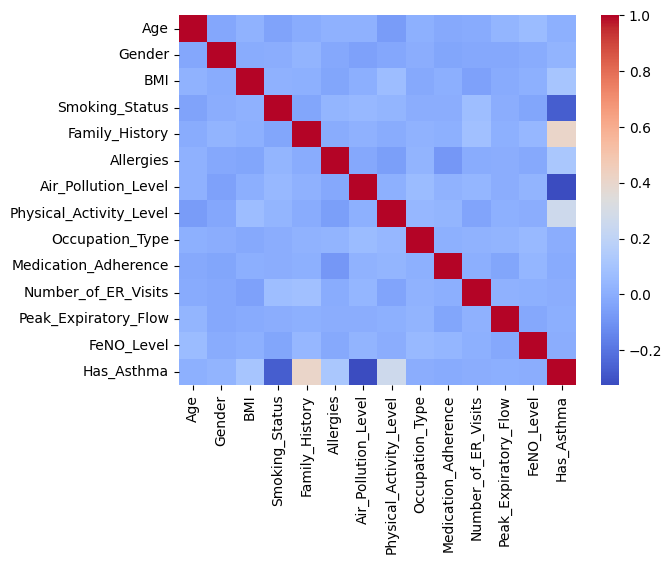

In [32]:


le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking_Status'] = le.fit_transform(df['Smoking_Status'])
df['Occupation_Type'] = le.fit_transform(df['Occupation_Type'])
df['Physical_Activity_Level'] = le.fit_transform(df['Physical_Activity_Level'])
df['Air_Pollution_Level'] = le.fit_transform(df['Air_Pollution_Level'])
df['Allergies'] = le.fit_transform(df['Allergies'])
sns.heatmap(df.corr(), cmap='coolwarm')


In [36]:
df.corr(numeric_only=True)["Has_Asthma"]


Age                        0.009921
Gender                     0.021801
BMI                        0.104424
Smoking_Status            -0.268993
Family_History             0.408137
Allergies                  0.117206
Air_Pollution_Level       -0.325256
Physical_Activity_Level    0.262004
Occupation_Type           -0.002225
Medication_Adherence      -0.009494
Number_of_ER_Visits       -0.004162
Peak_Expiratory_Flow       0.003832
FeNO_Level                -0.000463
Has_Asthma                 1.000000
Name: Has_Asthma, dtype: float64